## DBSCAN
### Density-Based Spatical Clustering Algorithm with Noise

A density-based algorithm for discovering clusters in large spatial database with noice.

### Proposal 

- Start from the point → estimate epsilon by local k-dist (cons: predetermined max_neighbors)

        If n_neighbors < max_neighbors
            use dbscan
        Else
            is outlier → use knn


In [1]:
import numpy as numpy
import scipy as scipy
from sklearn import cluster
import matplotlib.pyplot as plt
 
 
 
def set2List(NumpyArray):
    list_ = []
    for item in NumpyArray:
        list_.append(item.tolist())
    return list_
 
def GenerateData():
    x1=numpy.random.randn(50,2)
    x2x=numpy.random.randn(80,1)+12
    x2y=numpy.random.randn(80,1)
    x2=numpy.column_stack((x2x,x2y))
    x3=numpy.random.randn(100,2)+8
    x4=numpy.random.randn(120,2)+15
    z=numpy.concatenate((x1,x2,x3,x4))
    return z


class DBSCAN:
    def __init__(self,Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
        self.Epsilon = Epsilon
        self.MinumumPoints = MinumumPoints
        self.DistanceMethod = DistanceMethod
    
    def fit_predict(self,Dataset,query_index):
        Epsilon = self.Epsilon
        MinumumPoints = self.MinumumPoints
        DistanceMethod = self.DistanceMethod
    #    Dataset is a mxn matrix, m is number of item and n is the dimension of data
        m,n=Dataset.shape
        Visited=numpy.zeros(m,'int')
        Type=numpy.zeros(m)
    #   -1 noise, outlier
    #    0 border
    #    1 core
        ClustersList=[]
        Cluster=[]
        PointClusterNumber=numpy.zeros(m)
        PointClusterNumberIndex=1
        PointNeighbors=[]
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
        
        
        if Visited[query_index]==0:
            Visited[query_index]=1
            PointNeighbors=numpy.where(DistanceMatrix[query_index]<Epsilon)[0]
#             print("point neighbors",PointNeighbors)
            if len(PointNeighbors)<MinumumPoints:
                Type[query_index]=-1
            else:
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(query_index)
                PointClusterNumber[query_index]=PointClusterNumberIndex


                PointNeighbors=set2List(PointNeighbors)    
                self.ExpandCluster(Dataset[query_index], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1

#         print("Type",Type)
        return PointClusterNumber

    def cluster(self,Dataset):
        Epsilon = self.Epsilon
        MinumumPoints = self.MinumumPoints
        DistanceMethod = self.DistanceMethod
    #    Dataset is a mxn matrix, m is number of item and n is the dimension of data
        m,n=Dataset.shape
        Visited=numpy.zeros(m,'int')
        Type=numpy.zeros(m)
    #   -1 noise, outlier
    #    0 border
    #    1 core
        ClustersList=[]
        Cluster=[]
        PointClusterNumber=numpy.zeros(m)
        PointClusterNumberIndex=1
        PointNeighbors=[]
        DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
        
        for i in range(m):
            if Visited[i]==0:
                Visited[i]=1
                PointNeighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
#                 print("point neighbors",PointNeighbors)
                if len(PointNeighbors)<MinumumPoints:
                    Type[i]=-1
                else:
                    for k in range(len(Cluster)):
                        Cluster.pop()
                    Cluster.append(i)
                    PointClusterNumber[i]=PointClusterNumberIndex


                    PointNeighbors=set2List(PointNeighbors)    
                    self.ExpandCluster(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                    Cluster.append(PointNeighbors[:])
                    ClustersList.append(Cluster[:])
                    PointClusterNumberIndex=PointClusterNumberIndex+1

    #         print("Type",Type)
        return PointClusterNumber 



    def ExpandCluster(self,PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
        Neighbors=[]

        for i in PointNeighbors:
            if Visited[i]==0:
                Visited[i]=1
                Neighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
                if len(Neighbors)>=MinumumPoints:
    #                Neighbors merge with PointNeighbors
                    for j in Neighbors:
                        try:
                            PointNeighbors.index(j)
                        except ValueError:
                            PointNeighbors.append(j)

            if PointClusterNumber[i]==0:
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
        return
 


query data [ 5.42030857 15.85326399]


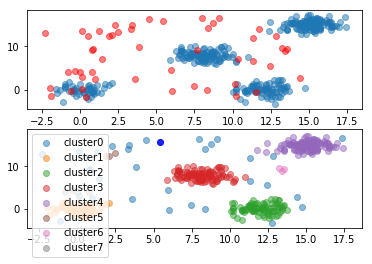

In [2]:
#Generating some data with normal distribution at 
#(0,0)
#(8,8)
#(12,0)
#(15,15)
Data=GenerateData()
 
#Adding some noise with uniform distribution 
#X between [-3,17],
#Y between [-3,17]
noise=scipy.rand(50,2)*20 -3
 
Noisy_Data=numpy.concatenate((Data,noise))

 
fig = plt.figure()
ax1=fig.add_subplot(2,1,1) #row, column, figure number
ax2 = fig.add_subplot(212)
 
ax1.scatter(Data[:,0],Data[:,1], alpha =  0.5 )
ax1.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)

 
Epsilon=1
MinumumPoints=3
query_index=350
dbscan =DBSCAN(Epsilon,MinumumPoints)
print("query data",Noisy_Data[query_index])
# result = dbscan.fit_predict(Noisy_Data,query_index)
result = dbscan.cluster(Noisy_Data)
#printed numbers are cluster numbers
# print(result)
# print(Noisy_Data)
#print "Noisy_Data"
#print Noisy_Data.shape
#print Noisy_Data

for clusterNumber in numpy.unique(result):
    
    ax2.scatter(Noisy_Data[numpy.where(result==clusterNumber),0],
                Noisy_Data[numpy.where(result==clusterNumber),1],
                alpha =  0.5, label='cluster{:.0f}'.format(clusterNumber))
ax2.scatter(Noisy_Data[query_index][0],Noisy_Data[query_index][1],color='blue' ,alpha =  0.8)
plt.legend()
plt.show()

In [6]:
from sklearn.neighbors import NearestNeighbors

In [9]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(Noisy_Data)

In [17]:
distances, indices = nbrs.kneighbors(Noisy_Data)

In [21]:
Noisy_Data.shape,distances.shape,indices.shape

((400, 2), (400, 3), (400, 3))

In [37]:
import seaborn as sns

/Users/jerryxyx/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


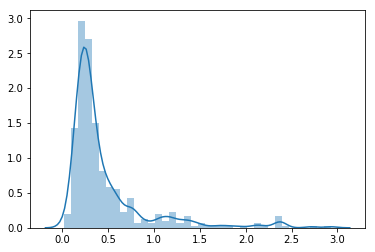

In [38]:
sns.distplot(distances[:,2])

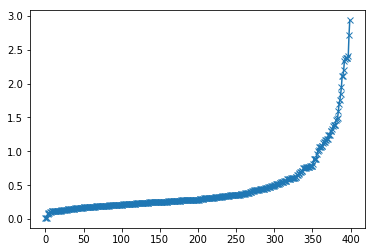

In [44]:
plt.plot(sorted(distances[:,2]),'x-')

In [45]:
import numpy as np
slope, intercept = np.interp(np.arange(len(distances)),sorted(distances[:,2]))

TypeError: interp() missing 1 required positional argument: 'fp'

In [42]:
slope

0.0029796419413354396

In [38]:
import numpy as numpy
import scipy as scipy
from sklearn import cluster
import matplotlib.pyplot as plt
 
 
 
def set2List(NumpyArray):
    list_ = []
    for item in NumpyArray:
        list_.append(item.tolist())
    return list_
 
def GenerateData():
    x1=numpy.random.randn(50,2)
    x2x=numpy.random.randn(80,1)+12
    x2y=numpy.random.randn(80,1)
    x2=numpy.column_stack((x2x,x2y))
    x3=numpy.random.randn(100,2)+8
    x4=numpy.random.randn(120,2)+15
    z=numpy.concatenate((x1,x2,x3,x4))
    return z
 
def DBSCAN(Dataset, Epsilon,MinumumPoints,DistanceMethod = 'euclidean'):
#    Dataset is a mxn matrix, m is number of item and n is the dimension of data
    m,n=Dataset.shape
    Visited=numpy.zeros(m,'int')
    Type=numpy.zeros(m)
#   -1 noise, outlier
#    0 border
#    1 core
    ClustersList=[]
    Cluster=[]
    PointClusterNumber=numpy.zeros(m)
    PointClusterNumberIndex=1
    PointNeighbors=[]
    DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod))
    for i in range(m):
        if Visited[i]==0:
            Visited[i]=1
            PointNeighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
#             print(PointNeighbors)
            if len(PointNeighbors)<MinumumPoints:
                Type[i]=-1
            else:
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
                
                
                PointNeighbors=set2List(PointNeighbors)    
                ExpandCluster(Dataset[i], PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                Cluster.append(PointNeighbors[:])
                ClustersList.append(Cluster[:])
                PointClusterNumberIndex=PointClusterNumberIndex+1
                 
                    
    return PointClusterNumber 
 
 
 
def ExpandCluster(PointToExapnd, PointNeighbors,Cluster,MinumumPoints,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]
 
    for i in PointNeighbors:
        if Visited[i]==0:
            Visited[i]=1
            Neighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            if len(Neighbors)>=MinumumPoints:
#                Neighbors merge with PointNeighbors
                for j in Neighbors:
                    try:
                        PointNeighbors.index(j)
                    except ValueError:
                        PointNeighbors.append(j)
                    
        if PointClusterNumber[i]==0:
            Cluster.append(i)
            PointClusterNumber[i]=PointClusterNumberIndex
    return
 


TypeError: 'DBSCAN' object is not iterable

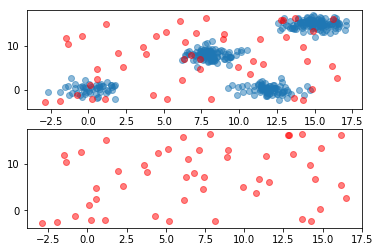

In [140]:
#Generating some data with normal distribution at 
#(0,0)
#(8,8)
#(12,0)
#(15,15)
Data=GenerateData()
 
#Adding some noise with uniform distribution 
#X between [-3,17],
#Y between [-3,17]
noise=scipy.rand(50,2)*20 -3
 
Noisy_Data=numpy.concatenate((Data,noise))
size=20
 
fig = plt.figure()
ax1=fig.add_subplot(2,1,1) #row, column, figure number
ax2 = fig.add_subplot(212)
 
ax1.scatter(Data[:,0],Data[:,1], alpha =  0.5 )
ax1.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
ax2.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5)
 
Epsilon=1
MinumumPoints=20
result =DBSCAN(Noisy_Data,Epsilon,MinumumPoints)
 
#printed numbers are cluster numbers
print(result)
# print(Noisy_Data)
#print "Noisy_Data"
#print Noisy_Data.shape
#print Noisy_Data
 
for i,clusterNumber in enumerate(result):
    if clusterNumber!=0:
        ax2.scatter(Noisy_Data[i][0],Noisy_Data[i][1],color='yellow' ,alpha =  0.5)
plt.show()

In [56]:
result.shape

(400,)

In [53]:
Noisy_Data.shape

(400, 2)

In [14]:
import numpy

def MyDBSCAN(D, eps, MinPts):
    """
    Cluster the dataset `D` using the DBSCAN algorithm.
    
    MyDBSCAN takes a dataset `D` (a list of vectors), a threshold distance
    `eps`, and a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
 
    # This list will hold the final cluster assignment for each point in D.
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
    
    # This outer loop is just responsible for picking new seed points--a point
    # from which to grow a new cluster.
    # Once a valid seed point is found, a new cluster is created, and the 
    # cluster growth is all handled by the 'expandCluster' routine.
    
    # For each point P in the Dataset D...
    # ('P' is the index of the datapoint, rather than the datapoint itself.)
    for P in range(0, len(D)):
    
        # Only points that have not already been claimed can be picked as new 
        # seed points.    
        # If the point's label is not 0, continue to the next point.
        if not (labels[P] == 0):
            continue
        
        # Find all of P's neighboring points.
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to 
        # something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else: 
            C += 1
            growCluster(D, labels, P, NeighborPts, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, NeighborPts, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `NeighborPts` - All of the neighbors of `P`
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # Assign the cluster label to the seed point.
    labels[P] = C
    
    # Look at each neighbor of P (neighbors are referred to as Pn). 
    # NeighborPts will be used as a FIFO queue of points to search--that is, it
    # will grow as we discover new branch points for the cluster. The FIFO
    # behavior is accomplished by using a while-loop rather than a for-loop.
    # In NeighborPts, the points are represented by their index in the original
    # dataset.
    i = 0
    while i < len(NeighborPts):    
        
        # Get the next point from the queue.        
        Pn = NeighborPts[i]
       
        # If Pn was labelled NOISE during the seed search, then we
        # know it's not a branch point (it doesn't have enough neighbors), so
        # make it a leaf point of cluster C and move on.
        if labels[Pn] == -1:
            labels[Pn] = C
        
        # Otherwise, if Pn isn't already claimed, claim it as part of C.
        elif labels[Pn] == 0:
            # Add Pn to cluster C (Assign cluster label C).
            labels[Pn] = C
            
            # Find all the neighbors of Pn
            PnNeighborPts = regionQuery(D, Pn, eps)
            
            # If Pn has at least MinPts neighbors, it's a branch point!
            # Add all of its neighbors to the FIFO queue to be searched. 
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts
            # If Pn *doesn't* have enough neighbors, then it's a leaf point.
            # Don't queue up it's neighbors as expansion points.
            #else:
                # Do nothing                
                #NeighborPts = NeighborPts               
        
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    # For each point in the dataset...
    for Pn in range(0, len(D)):
        
        # If the distance is below the threshold, add it to the neighbors list.
        if numpy.linalg.norm(D[P] - D[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

In [18]:
numpy.linalg.norm([1,2])

2.23606797749979

In [26]:
scipy.spatial.distance.pdist([[1,2],[2,3],[3,4],[4,5]],'euclidean')

array([1.41421356, 2.82842712, 4.24264069, 1.41421356, 2.82842712,
       1.41421356])

In [25]:
scipy.spatial.distance.squareform(scipy.spatial.distance.pdist([[1,2],[2,3],[3,4],[4,5]],'euclidean'))

array([[0.        , 1.41421356, 2.82842712, 4.24264069],
       [1.41421356, 0.        , 1.41421356, 2.82842712],
       [2.82842712, 1.41421356, 0.        , 1.41421356],
       [4.24264069, 2.82842712, 1.41421356, 0.        ]])

In [27]:
scipy.spatial.distance.squareform?